#### Загрузка библиотек и необходимых модулей

In [1]:
knitr::opts_chunk$set(message = FALSE)

In [3]:
library(corrplot)
library(dplyr) 
library(readr)
library(ggplot2)
library(sp)
library(raster)
library(usdm)

In [4]:
library(lattice)
library(ggplot2)
library(caret)

#### Загрузка и первичный анализ данных

In [5]:
# список файлов в рабочей директории
list.files("data")

[1] "churn_data.csv"       "online.csv"           "salesData.csv"       
[4] "salesDataMon2To4.csv"

__salesData: данные по продажам за текущий и три предыдущих месяца__

In [6]:
salesData <- read.csv("data/salesData.csv")

In [7]:
str(salesData, give.attr = FALSE)

'data.frame':	5122 obs. of  14 variables:
 $ id                   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ nItems               : int  1469 1463 262 293 108 216 174 122 204 308 ...
 $ mostFreqStore        : Factor w/ 10 levels "Boston","Colorado Springs",..: 10 10 2 2 2 1 3 9 6 9 ...
 $ mostFreqCat          : Factor w/ 10 levels "Alcohol","Baby",..: 1 1 10 3 4 1 8 10 3 1 ...
 $ nCats                : int  72 73 55 50 32 41 36 31 41 52 ...
 $ preferredBrand       : Factor w/ 10 levels "Akar","Alekto",..: 10 10 3 10 3 3 3 3 3 3 ...
 $ nBrands              : int  517 482 126 108 79 98 78 62 99 103 ...
 $ nPurch               : int  82 88 56 43 18 35 34 12 26 33 ...
 $ salesLast3Mon        : num  2742 2791 1530 1766 1180 ...
 $ salesThisMon         : num  1284 1243 683 730 553 ...
 $ daysSinceLastPurch   : int  1 1 1 1 12 2 2 4 14 1 ...
 $ meanItemPrice        : num  1.87 1.91 5.84 6.03 10.93 ...
 $ meanShoppingCartValue: num  33.4 31.7 27.3 41.1 65.6 ...
 $ customerDuration     : int  821 657 5

In [8]:
summary(salesData)

       id           nItems                mostFreqStore         mostFreqCat  
 Min.   :   1   Min.   :   1.0   Seattle         :1089   Alcohol      :1439  
 1st Qu.:1381   1st Qu.:  83.0   Columbus        : 946   Shoes        : 969  
 Median :2742   Median : 157.0   Boston          : 871   Baby         : 846  
 Mean   :2740   Mean   : 186.3   Colorado Springs: 520   Frozen food  : 595  
 3rd Qu.:4099   3rd Qu.: 258.0   Orlando         : 456   Packaged food: 437  
 Max.   :5455   Max.   :1469.0   Honolulu        : 356   Bakery       : 264  
                                 (Other)         : 884   (Other)      : 572  
     nCats       preferredBrand    nBrands           nPurch      salesLast3Mon 
 Min.   : 1.00   Bo     :3247   Min.   :  1.00   Min.   : 1.00   Min.   : 189  
 1st Qu.:27.00   Nilima : 754   1st Qu.: 45.00   1st Qu.:11.00   1st Qu.:1067  
 Median :37.00   Veina  : 679   Median : 75.50   Median :17.00   Median :1332  
 Mean   :36.36   Medeia : 156   Mean   : 81.92   Mean   

In [9]:
# проверка наличия отсутсвуующих данных (Nan)
print(sapply(salesData, function(x) sum(is.na(x))))

                   id                nItems         mostFreqStore 
                    0                     0                     0 
          mostFreqCat                 nCats        preferredBrand 
                    0                     0                     0 
              nBrands                nPurch         salesLast3Mon 
                    0                     0                     0 
         salesThisMon    daysSinceLastPurch         meanItemPrice 
                    0                     0                     0 
meanShoppingCartValue      customerDuration 
                    0                     0 


__salesData2_4: данные по продажам только за  три предыдущих месяца__

In [10]:
salesData2_4 <- read.csv("data/salesDataMon2To4.csv")

In [11]:
str(salesData2_4, give.attr = FALSE)

'data.frame':	5173 obs. of  13 variables:
 $ id                   : int  1 2 3 4 5 6 7 9 10 11 ...
 $ nItems               : int  1401 1461 262 250 149 208 166 188 295 224 ...
 $ mostFreqStore        : Factor w/ 10 levels "Boston","Colorado Springs",..: 10 10 2 2 2 1 3 6 9 6 ...
 $ mostFreqCat          : Factor w/ 10 levels "Alcohol","Baby",..: 1 1 10 3 8 10 8 3 1 1 ...
 $ nCats                : int  73 74 55 43 36 35 39 43 55 40 ...
 $ preferredBrand       : Factor w/ 10 levels "Akar","Alekto",..: 10 10 3 10 3 3 8 3 3 3 ...
 $ nBrands              : int  483 484 131 93 90 82 76 92 100 80 ...
 $ nPurch               : int  85 86 55 44 27 33 34 26 30 22 ...
 $ salesLast3Mon        : num  2713 2745 1527 1675 1265 ...
 $ daysSinceLastPurch   : int  3 2 1 2 4 1 7 1 2 2 ...
 $ meanItemPrice        : num  1.94 1.88 5.83 6.7 8.49 ...
 $ meanShoppingCartValue: num  31.9 31.9 27.8 38.1 46.9 ...
 $ customerDuration     : int  852 688 579 627 634 704 643 740 511 515 ...


In [12]:
summary(salesData2_4)

       id           nItems                mostFreqStore         mostFreqCat  
 Min.   :   1   Min.   :   1.0   Seattle         :1104   Alcohol      :1506  
 1st Qu.:1372   1st Qu.:  84.0   Columbus        : 952   Shoes        : 930  
 Median :2733   Median : 155.0   Boston          : 873   Baby         : 857  
 Mean   :2729   Mean   : 185.9   Colorado Springs: 530   Frozen food  : 549  
 3rd Qu.:4085   3rd Qu.: 257.0   Orlando         : 467   Packaged food: 471  
 Max.   :5455   Max.   :1461.0   Honolulu        : 359   Bakery       : 276  
                                 (Other)         : 888   (Other)      : 584  
     nCats       preferredBrand    nBrands           nPurch      salesLast3Mon 
 Min.   : 1.00   Bo     :3328   Min.   :  1.00   Min.   : 1.00   Min.   : 189  
 1st Qu.:27.00   Nilima : 771   1st Qu.: 45.00   1st Qu.:11.00   1st Qu.:1068  
 Median :37.00   Veina  : 709   Median : 75.00   Median :17.00   Median :1331  
 Mean   :36.23   Medeia : 152   Mean   : 81.66   Mean   

In [13]:
# проверка наличия отсутсвуующих данных (Nan)
print(sapply(salesData2_4, function(x) sum(is.na(x))))

                   id                nItems         mostFreqStore 
                    0                     0                     0 
          mostFreqCat                 nCats        preferredBrand 
                    0                     0                     0 
              nBrands                nPurch         salesLast3Mon 
                    0                     0                     0 
   daysSinceLastPurch         meanItemPrice meanShoppingCartValue 
                    0                     0                     0 
     customerDuration 
                    0 


## __Предсказание пожизненной ценности клиента при помощи Линейной Регресии__
В данном кейсе произведен анализ пожизненной ценности клиента (Customer Lifetime Value CLV) при помощи Линейной регрессии (Linear Regression).

### Какие преимущества дает анализ оценки Пожизненной ценности клиента в маркетинге
<pr>Данная метрика является важным маркетологическим показателем. При помощи данной метрики можно идентифицировать наиболее ценных клиентов, которые с большей долей вероятности сгенерируют большую часть чистой прибыли в текущем и будущих периодах.  На практике это позволяет организовать наиболее эффективную целевую CRM компанию, в рамках которой каждый клиент будет получать предложения и скидки в зависимости от его  текущей ценности для компании. Также это помогает снизить затраты на привлечение новых клиентов, т.к. зачастую затраты на привлечение новых клиентов намного превосходят затраты на стимулирование и удержание текущих.

<pr>Далее при помощи предикативных методик таких как Линейная Регрессия (Linear Regression) с большой долей вероятности можно спрогнозировать  чистую прибыль в текущем и будущих периодах на основе данных за предыдущие.

## __1. Первичный анализ данных при помощи инструментов визуализации__
При помощи инcтрументов визуализации можно не только быстро определить если ли какие-то взаимосвязи (корреляция) между различными показателями продаж, но и ответить на вопросы на какой город приходится наибольшее количество продаж или каков размер выручки от продажи наиболее часто продаваемых брендов.

__Исходнные данные salesData содержат следующую информацию:__
* __salesLast3Mon:__ данные по продажам на каждого клиента за последние 3 месяца
* __salesThisMon:__ данные по продажам на каждого клиента за последний месяц
* __id:__ уникальный идентификатор покупателя: 
* __mostFreqStore:__ магазин где клиент чаще всего совершал покупки: 
* __mostFreqCat:__ категория товаров, которые клиент приобретал чаще всего: 
* __nCats:__ общее количество категорий товаров, которые приобретал клиент
* __preferredBrand:__ бренд, товары который наиболее часто приобрел клиент: 
* __nBrands:__ общее количество брендов, товары которых приобретал клиент: 

### Визуализация зависимости (корреляции) между различными показателями

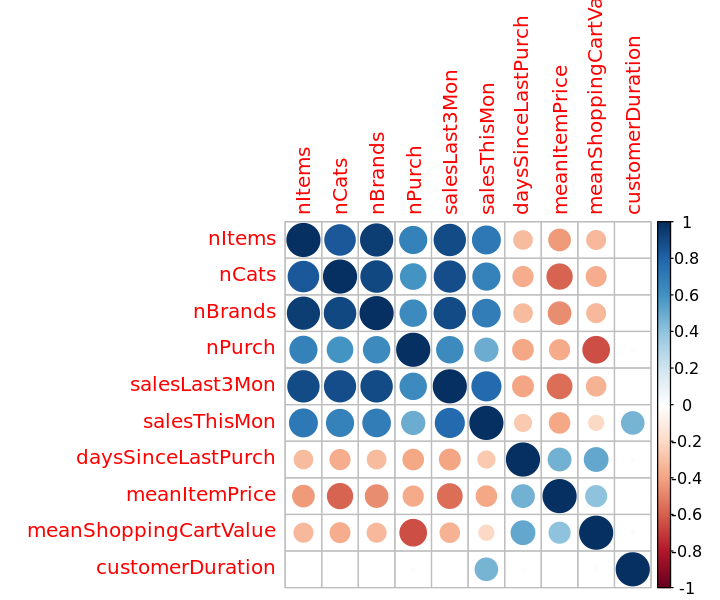

In [14]:
options(repr.plot.width=6, repr.plot.height=5)

salesData %>% select_if(is.numeric) %>% dplyr::select(-id) %>%
  cor() %>% corrplot()

### Магазины по количеству выручки, которая пришлась на каждый их них 
согласно приведенному ниже графику, наибольшее количество выручки в текущем месяце пришлось на магазины расположенные в городе Стоктон (Stockton)

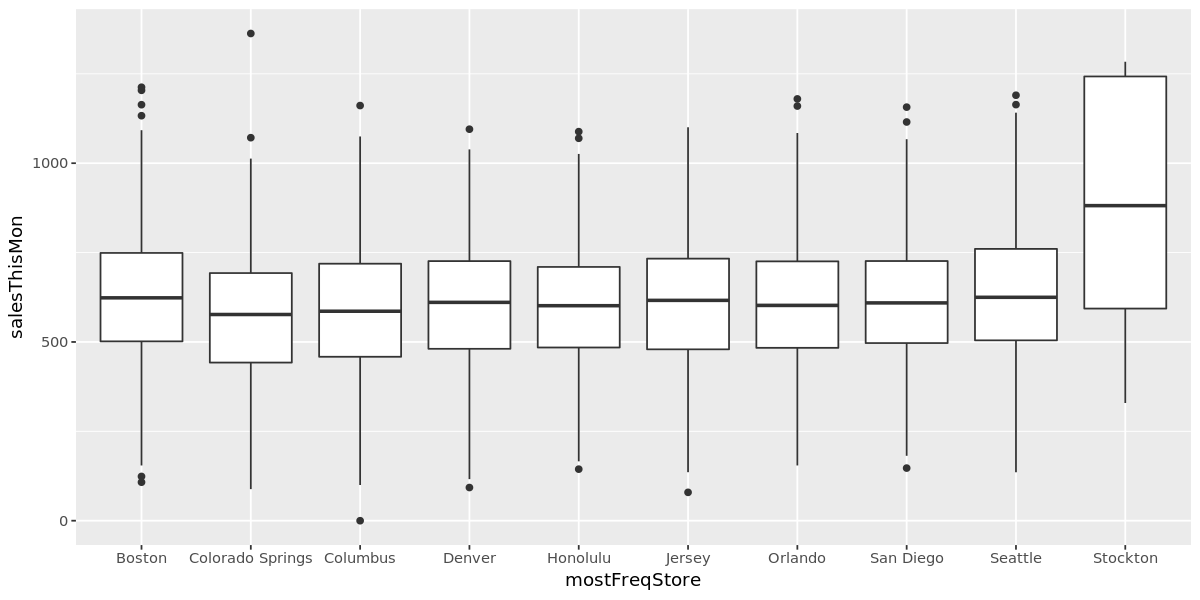

In [29]:
options(repr.plot.width=10, repr.plot.height=5)

ggplot(salesData) +
    geom_boxplot(aes(x = mostFreqStore, y = salesThisMon))

### График распределения выручки среди наиболее популярных брендов  в текущем месяце

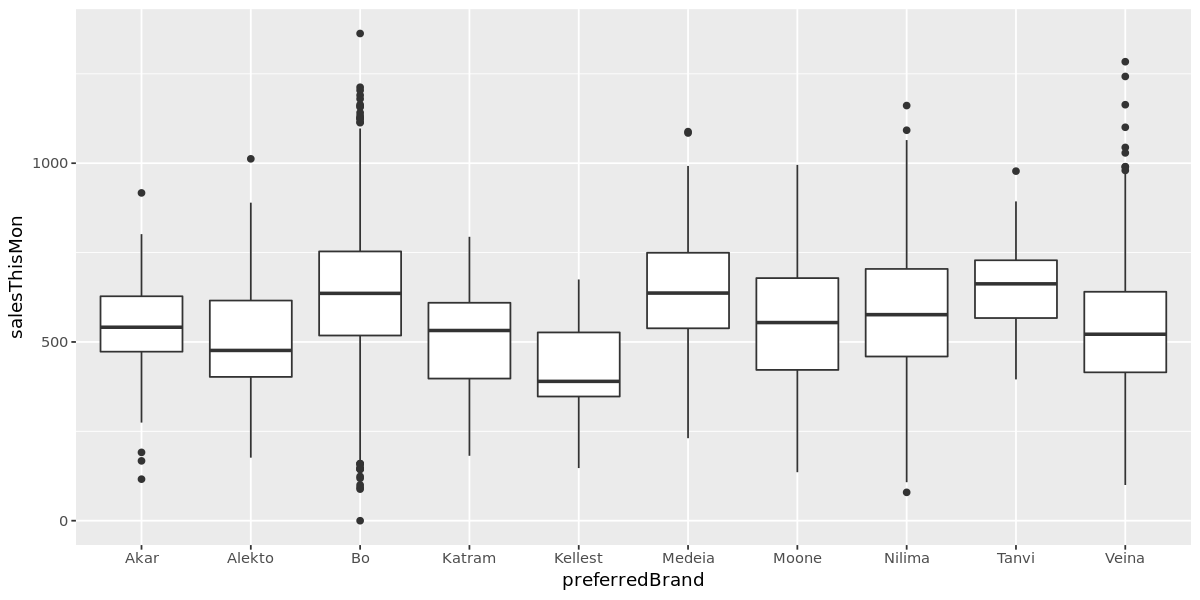

In [32]:
options(repr.plot.width=10, repr.plot.height=5)

ggplot(salesData) +
    geom_boxplot(aes(x = preferredBrand, y = salesThisMon))

### Построение простой модели Линейной регрессии
в данном случае мы исходим из предположения, что существует положительная линейная зависимость показателей продаж текущего месяца от показателей продаж за 3 предыдущих периода.

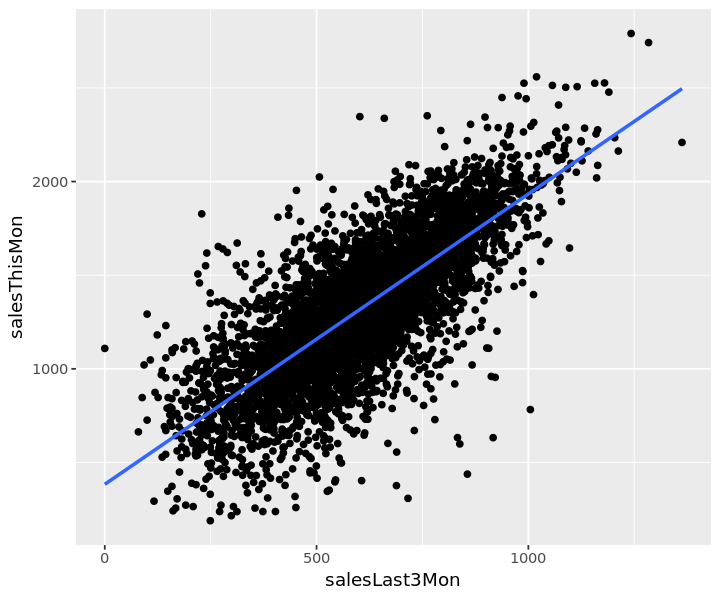

In [27]:
ggplot(salesData, aes(salesThisMon, salesLast3Mon)) +
    geom_point() +
    geom_smooth(method = lm, se = FALSE) +
    xlab("salesLast3Mon") +
    ylab("salesThisMon")

# __Основные этапы создания и выбора модели__
* Подготовка данных для последующего построения модели
* Выбор параметров с использованием Дисперсионного Фактора Инфляции (Variance Inflation Factors)
* Построение модели
* Интерпретация параметров модели и коэффициентов
* Оценка модели и построение прогноза

## __Подготовка данных для последующего построения модели__
<pr>При обучение модели на имеющихся данных  основной проблемой является переобучение. При переобучении модель показывает отличные результаты на текущих данных, но не может обобщить основные тренды. В результате при использовании модели для анализа новых данных полученный результат будет примерно таким же как и у базовой модели (base line model), согласно которой интересующие нас событие произойдет с вероятностью 50%.<pr>
    
<pr>Для того чтобы избежать переобучения нам необходимо разделить данные случайным образом на две части, одна из них будет так называемый training set на котором будет происходит обучение модели. Вторая часть test set служит для оценки нашей модели, как хорошо построенная модель способна предсказать интересующий нас показатель на новых данных. Данный подход называется Out-of-Sample Validation<pr>    

#### __Out-of-Sample Validation (разделение данных на две части training and test)__

In [16]:
# set.seed позволяет каждый раз воспроизводить компоненты сгенирированные случайным образом
set.seed(534381) 
 
# сгенирировать индексы случайным для training и test set 
trainIndex <- createDataPartition(salesData$salesThisMon,p=0.75,list=FALSE)

#разделить данные на training/testing set 
train <- salesData[trainIndex,] #training data (75% of data)
test <- salesData[-trainIndex,] #testing data (25% of data)

## __Выбор параметров с использованием Дисперсионного Фактора Инфляции__
<pr>Основной проблемой при построении модели множественной линейной регресии может стать мультиколлинеарность (Multicollinearity)<pr>

<pr>__Мультиколлинеарность:__ ситуация когда в регрессионной модели есть линейная зависимости между объясняющими переменными (факторами) 
    
<pr>__Решение:__ проверка на наличие Мультиколлинеарности при помощи Дисперсионного Фактора Инфляции (Variance Inflation Factors). <pr>

### Проверка на наличие мультиколлинеарности

In [18]:
options(warn=-1)
train %>% dplyr::select(-id, -preferredBrand, -nBrands) %>% vif()

Variables,VIF
nItems,7.087673
mostFreqStore,NA
mostFreqCat,NA
nCats,5.972018
nPurch,3.163329
salesLast3Mon,12.293539
salesThisMon,5.646232
daysSinceLastPurch,1.658832
meanItemPrice,1.956865
meanShoppingCartValue,2.444351


## __Построение модели__

In [19]:
train %>% dplyr::select(-id, -preferredBrand, -nBrands)-> train

In [20]:
salesModel = lm(salesThisMon ~ . , data = train)
summary(salesModel)


Call:
lm(formula = salesThisMon ~ ., data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-324.16  -51.87    0.96   50.61  301.21 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   -2.777e+02  1.161e+01 -23.917  < 2e-16 ***
nItems                         1.536e-01  2.418e-02   6.352 2.38e-10 ***
mostFreqStoreColorado Springs -7.255e+00  5.036e+00  -1.440  0.14983    
mostFreqStoreColumbus         -5.244e-01  4.255e+00  -0.123  0.90192    
mostFreqStoreDenver           -1.211e+01  5.939e+00  -2.038  0.04160 *  
mostFreqStoreHonolulu         -1.511e+01  5.611e+00  -2.693  0.00712 ** 
mostFreqStoreJersey           -2.660e+01  5.644e+00  -4.714 2.52e-06 ***
mostFreqStoreOrlando          -8.686e+00  5.170e+00  -1.680  0.09300 .  
mostFreqStoreSan Diego        -1.800e+01  6.609e+00  -2.724  0.00648 ** 
mostFreqStoreSeattle          -8.183e+00  4.044e+00  -2.023  0.04310 *  
mostFreqStoreStockton         -1.127

## __Интерпретация параметров модели и коэффициентов__
Согласно выше приведенной сводки нашей модели Multiple R-squared примерно равен 0.80.Так как данный коэффициент больше нуля, следовательно мы можем прийти к выводу на основе наших данных, что существует положительная корреляция между переменными и созданная модель объясняет 80 процентов дисперсии в данных по продажам в текущем месяце.

### Выводы, к которым мы можем построить на основе данной модели
__Средняя цена товара напрямую влияет на показатели выручки в этом месяце__ При увеличении средней цены товара на 1 Евро приведет к увеличению показателя продаж в этом месяце на 0.23 Евро. Т.е. чем более дорогие товары покупает наш клиент тем больше покупок в итоге мы можем ожидать от него.
<pr> The more expensive the items are that a person buys, the more sales she is expected to generate.

## __Оценка модели и построение прогноза__

### Два метода оценки Линейной регрессии
* __Коэффициент детерминации (Multiple R-squared)__: этот показатель показывает как Регрессионная модель описывает дисперсию зависимой переменной,
<br> если __Коэффициент детерминации__ равен 1 это означает что Регрессионная модель __объясняет__ дисперсию зависимой переменной на 100%
<br> если __Коэффициент детерминации__ равен 0 это означает что Регрессионная модель __не объясняет__ дисперсию ни одной из переменных 

* __F-тест или критерий Фишера__
<br>если значение величины p-value < 0.05, тогда H0 нулевая гипотеза, что коэффициент детерминации равен нулю и нет никакой корреляции между независимой и зависимой переменными отвергается

* __Cреднеквадратичная ошибка  MSE (Mean squared error)__: этот параметр измеряет среднее значение квадратов ошибок, то есть среднеквадратическую разницу между действительным и предсказанным значениями.

<pr> __Пример:__ Если значение Коэффициента детерминации равно 0.8236, это говорит нам о том, что 82.36% дисперсии зависимой переменной (variable of interest) объясняется независимой переменной.

### Cреднеквадратичная ошибка  MSE (Mean squared error)
данный параметр используется при выборе наиболее точной модели из нескольких альтернатив (модели с различным количество параметров), чем меньше значение среднеквадратичной ошибки, тем лучше данная модель

In [21]:
test$predictsalesThisMon <- predict(salesModel, newdata = test)

In [22]:
mse <- mean((test$salesThisMon- test$predictsalesThisMon)^2)
mse

[1] 6122.039

### Построение прогноза с использованием новых данных
после оценки и выбора наиболее точной модели, мы можем использовать нашу модель для построения прогнозов на основе новых данных, в данном случае нас интересует среднее значение продаж в будущем периоде на основе текущих данных

In [25]:
# прогноз по продажам
predSales5 <- predict(salesModel, newdata = salesData2_4)

# средний показатель продаж в будущем периоде
mean(predSales5, , na.rm = TRUE)

[1] 624.8811